## Set Up

In [9]:
# autoreload
%load_ext autoreload
%autoreload 2
# jupyter black formatter
%load_ext jupyter_black

import subprocess
import os
import sys

gitroot_path = subprocess.check_output(
    ["git", "rev-parse", "--show-toplevel"], universal_newlines=True
)

os.chdir(os.path.join(gitroot_path[:-1], "pirnns"))
print("Working directory: ", os.getcwd())

sys_dir = os.path.dirname(os.getcwd())
sys.path.append(sys_dir)
print("Directory added to path: ", sys_dir)
sys.path.append(os.getcwd())
print("Directory added to path: ", os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black
Working directory:  /home/facosta/pirnns/pirnns
Directory added to path:  /home/facosta/pirnns
Directory added to path:  /home/facosta/pirnns/pirnns


## Load Models from Sweep

In [10]:
from pirnns.analysis.load_models import load_experiment_sweep
import torch

# sweep_dir = (
#     "/home/facosta/pirnns/pirnns/logs/experiments/timescales_sweep_20251002_064332"
# )

sweep_dir = "/home/facosta/pirnns/pirnns/logs/experiments/batch_sweep_20251004_000019"

device = "cuda" if torch.cuda.is_available() else "cpu"

models, metadata, summary = load_experiment_sweep(
    sweep_dir=sweep_dir,
    device=device,
    use_lightning_checkpoint=True,
    checkpoint_type="best",
)

⚠ sweep_summary.yaml not found (sweep may be incomplete)
Loading 12 experiments with 4 seeds each...
Total models to load: 48
Using Lightning checkpoints

Loading experiment: batch_size_50
  ✓ Loaded batch_size_50/seed_0
  ✓ Loaded batch_size_50/seed_1
  ✓ Loaded batch_size_50/seed_2
  ✓ Loaded batch_size_50/seed_3
Loading experiment: batch_size_100
  ✓ Loaded batch_size_100/seed_0
  ✓ Loaded batch_size_100/seed_1
  ✓ Loaded batch_size_100/seed_2
  ✓ Loaded batch_size_100/seed_3
Loading experiment: batch_size_200
  ✓ Loaded batch_size_200/seed_0
  ✓ Loaded batch_size_200/seed_1
  ✓ Loaded batch_size_200/seed_2
  ✓ Loaded batch_size_200/seed_3
Loading experiment: batch_size_300
  ✓ Loaded batch_size_300/seed_0
  ✓ Loaded batch_size_300/seed_1
  ✓ Loaded batch_size_300/seed_2
  ✓ Loaded batch_size_300/seed_3
Loading experiment: batch_size_400
  ✓ Loaded batch_size_400/seed_0
  ✓ Loaded batch_size_400/seed_1
  ✓ Loaded batch_size_400/seed_2
  ✓ Loaded batch_size_400/seed_3
Loading experim

## Plot Training Metrics

In [11]:
from pirnns.analysis.plotting import plot_training_curves_sweep

### Training Loss

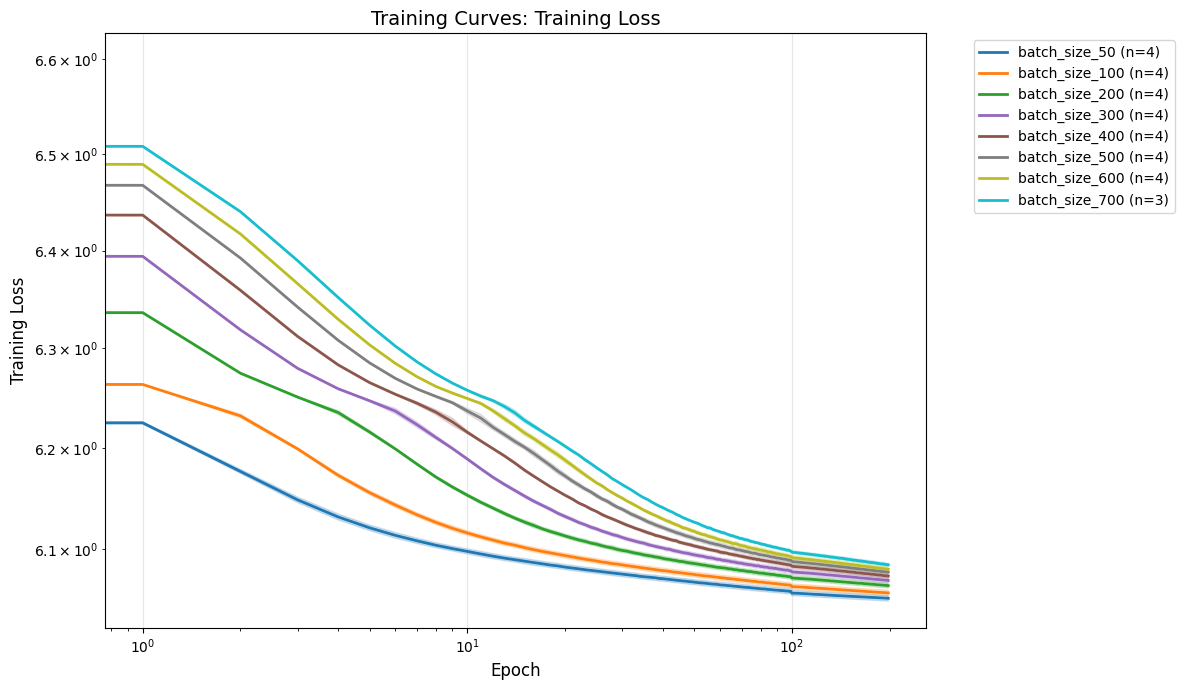

In [12]:
plot_training_curves_sweep(models, metric="train_loss", log_x=True, log_y=True)

### Validation Loss

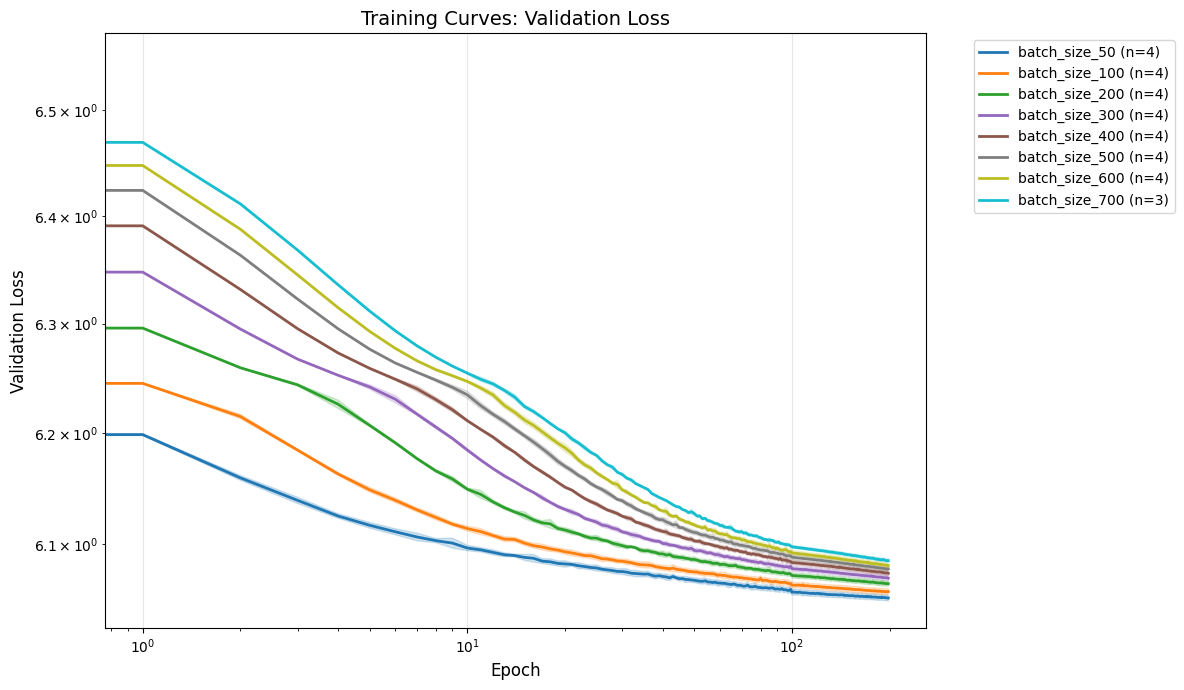

In [13]:
plot_training_curves_sweep(models, metric="val_loss", log_x=True, log_y=True)

### Decoding Error

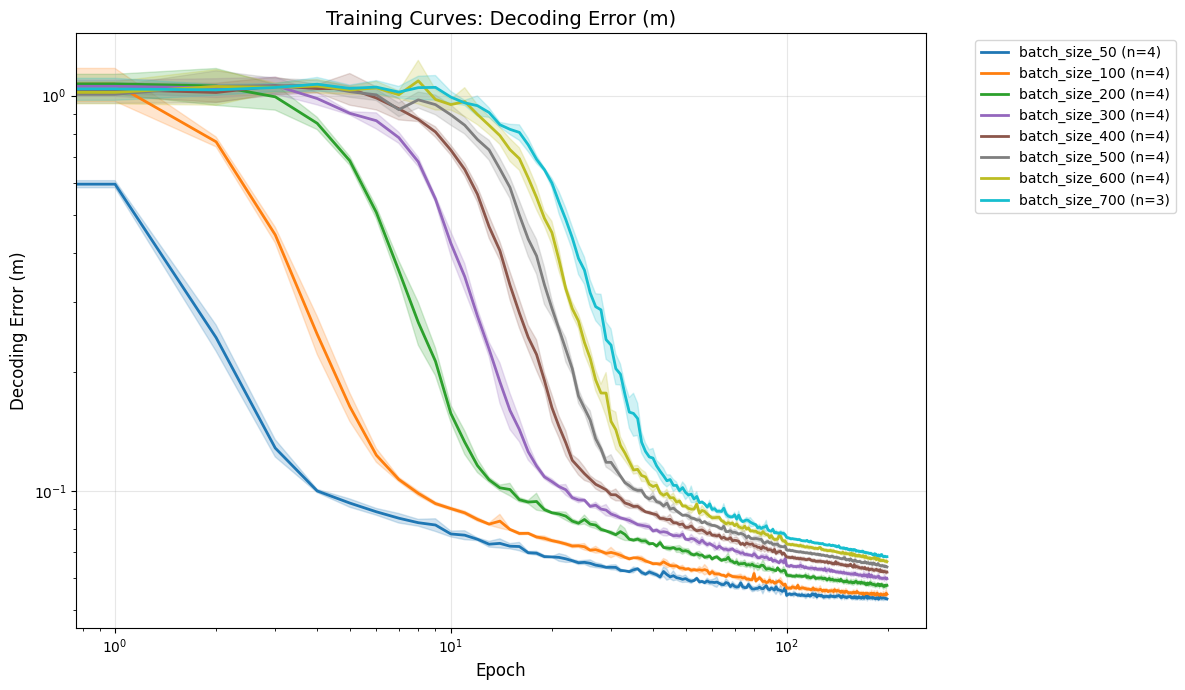

In [14]:
plot_training_curves_sweep(models, metric="decoding_error", log_x=True, log_y=True)